## import lib.

In [46]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import sklearn
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree

## loading dataset

In [2]:
# For CSV File
df=pd.read_csv('EPSlion/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


from info, all columns is numeric , don't need to clean and No missing data

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


for describe,we see outliers in (	creatinine_phosphokinase ,platelets,serum_creatinine).
To ensure, we will use  visualization 

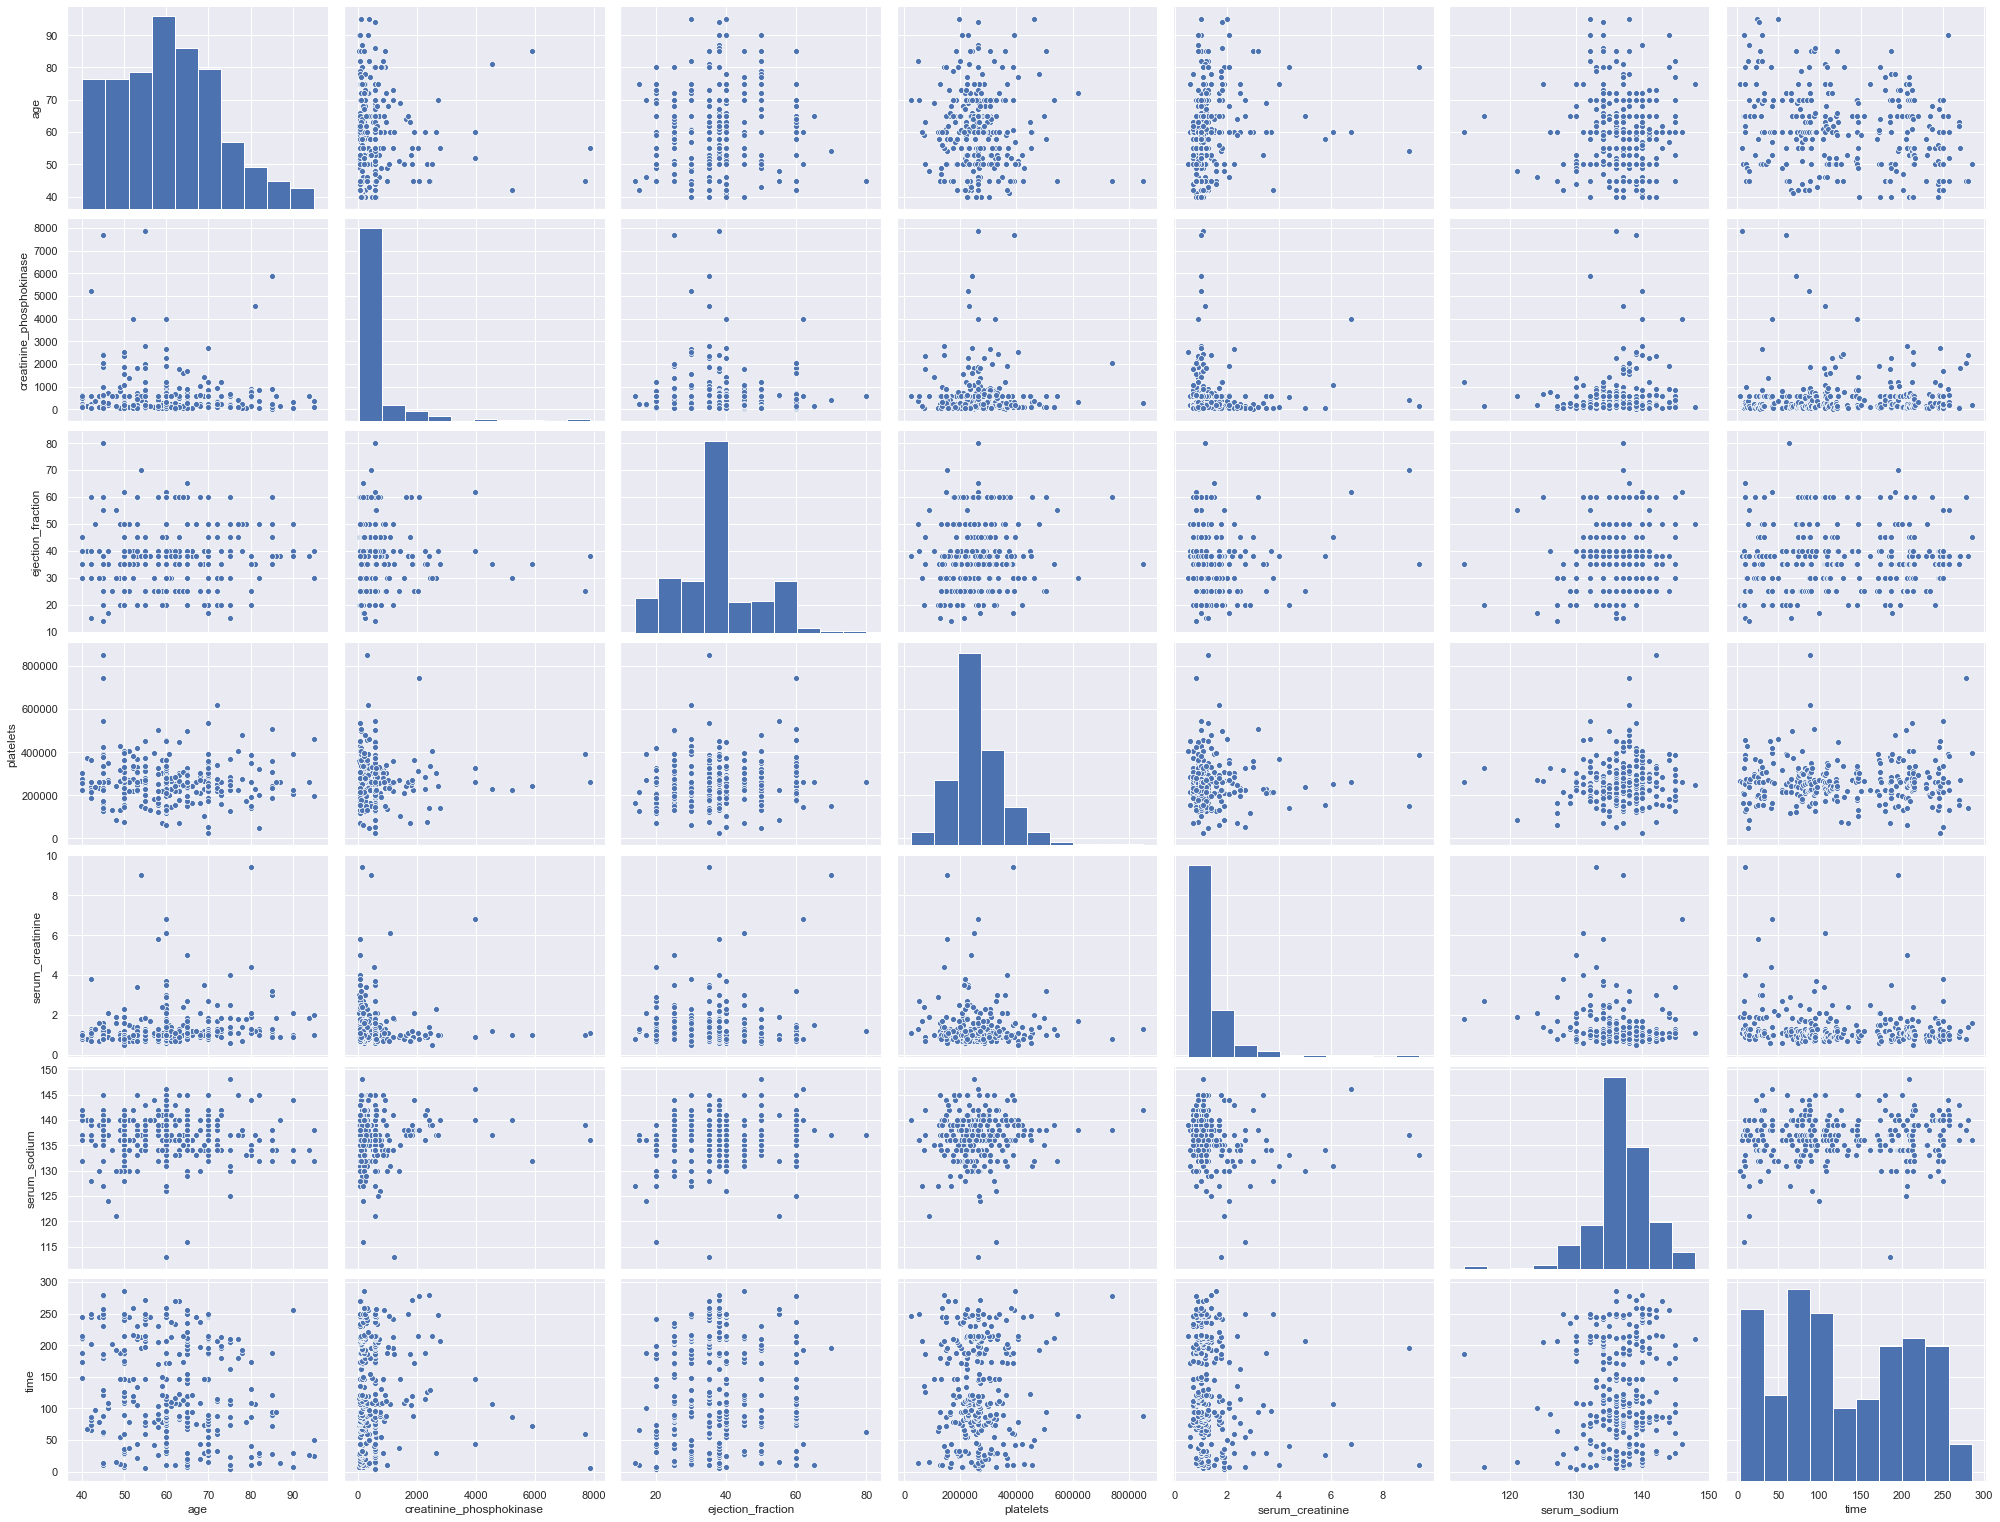

In [9]:
sns.pairplot(df, vars=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'], height=3, aspect=1.3)

from pair ,the outlier in ('creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium')

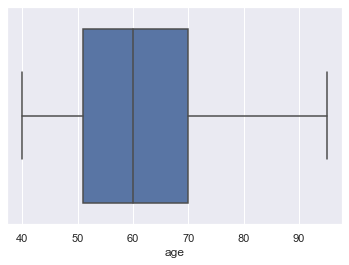

In [12]:
sns.boxplot(x=df['age'])

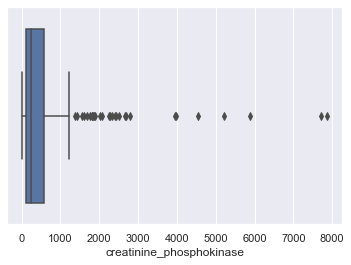

In [14]:
sns.boxplot(x=df['creatinine_phosphokinase'])

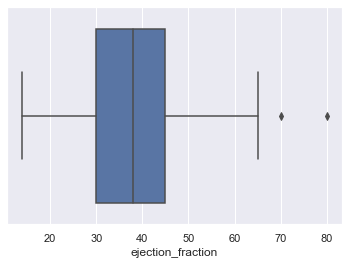

In [15]:
sns.boxplot(x=df['ejection_fraction'])

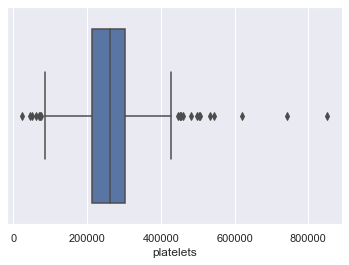

In [16]:
sns.boxplot(x=df['platelets'])

the platelets column also has outliers

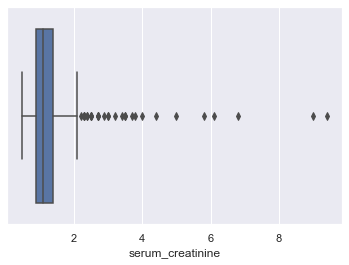

In [17]:
sns.boxplot(x=df['serum_creatinine'])

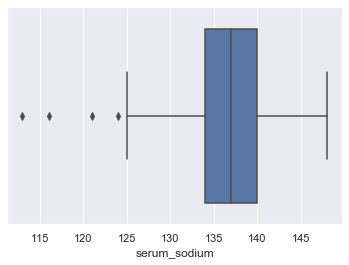

In [18]:
sns.boxplot(x=df['serum_sodium'])

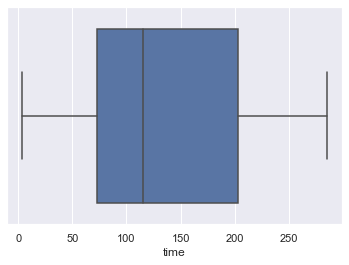

In [19]:
sns.boxplot(x=df['time'])

from boxplot ,the outlier in ('creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium')

we will remove the outliers in processing stage

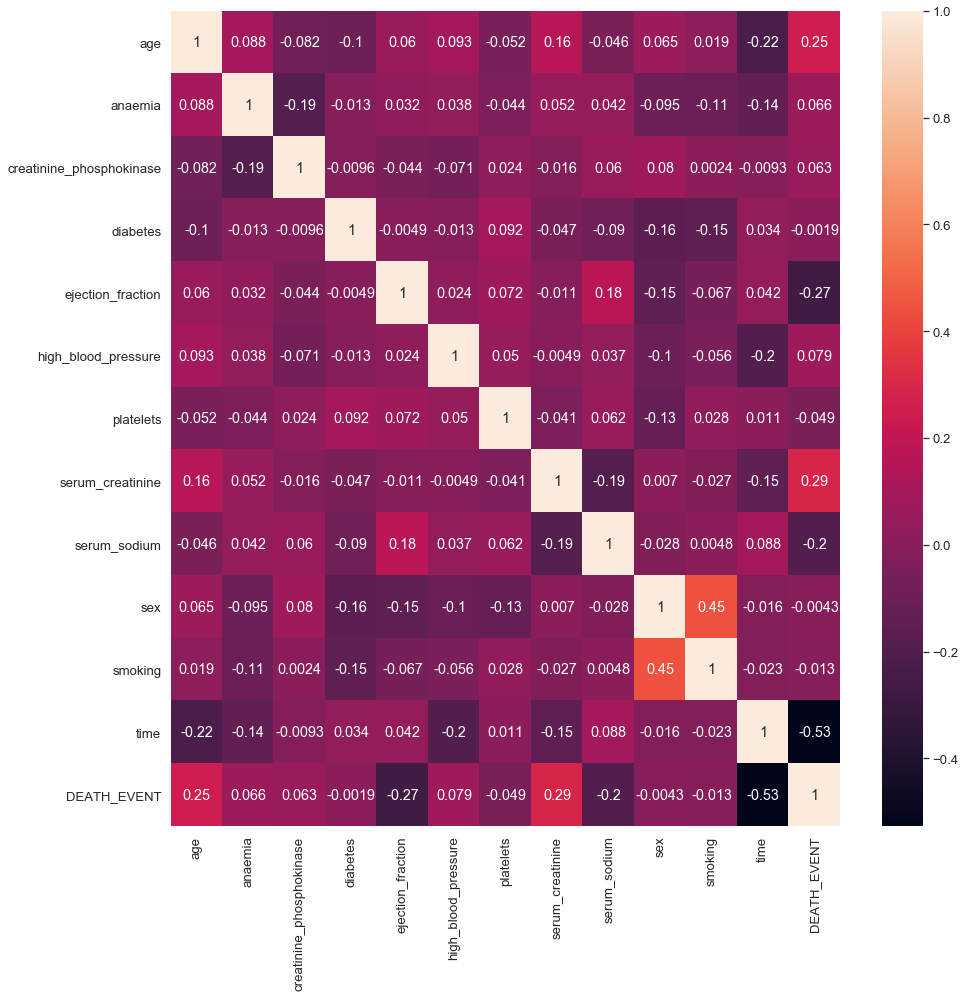

In [23]:
sns.set(rc={'figure.figsize': [15,15]}, font_scale=1.2)
sns.heatmap( df.corr(),annot= True)

non-correlated columns with DEATH_EVENT:('anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking')

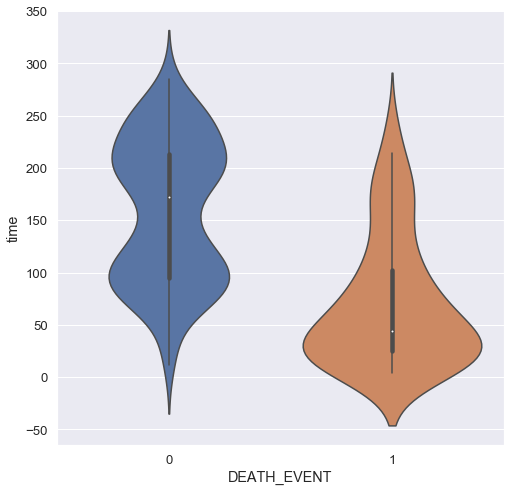

In [27]:
sns.set(rc={'figure.figsize': [8,8]}, font_scale=1.2)
sns.violinplot(x="DEATH_EVENT", y="time", data=df)

In [30]:
df[df['time']<=0]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


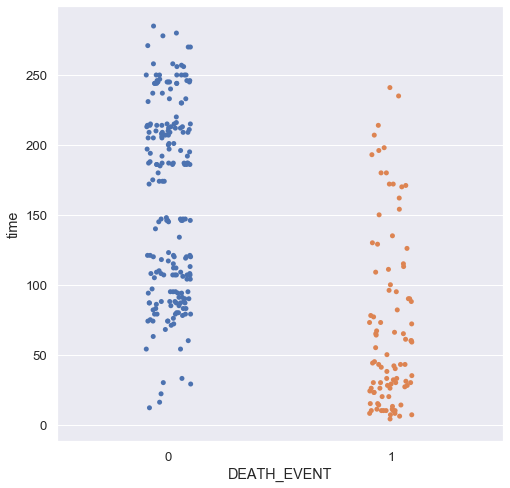

In [31]:
sns.stripplot(x="DEATH_EVENT", y="time", data=df)

The majority of deaths during the follow-up period are between 0 to 75

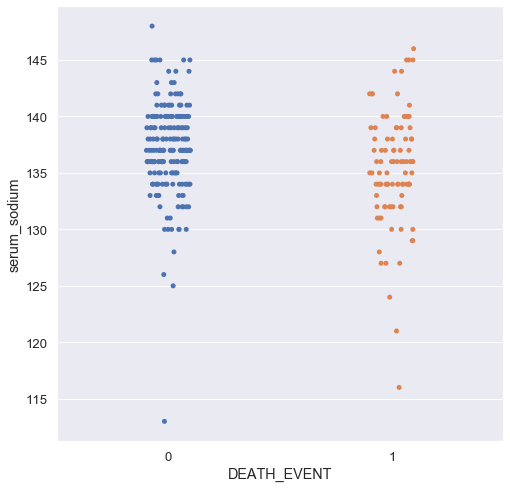

In [33]:

sns.stripplot(x="DEATH_EVENT", y="serum_sodium", data=df)

## Pre-processing stage

In [35]:
#drop non-correlated columns
df.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking'],axis=1, inplace=True)
df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


In [39]:
outliers_indices = detect_outliers(df, 0, df.columns)

In [40]:
outliers_indices

[64,
 217,
 4,
 9,
 10,
 28,
 31,
 35,
 38,
 39,
 48,
 52,
 54,
 56,
 61,
 65,
 82,
 104,
 117,
 124,
 129,
 131,
 150,
 167,
 183,
 203,
 228,
 247,
 281,
 282,
 19,
 126,
 199]

In [41]:
df.drop(outliers_indices, inplace=True)
df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
5,90.0,40,2.1,132,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


## Split data

In [45]:
y=df['DEATH_EVENT']
X=df.drop(['DEATH_EVENT'],1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

## Logistic Regression

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8148148148148148

## svm

In [48]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

## DecisionTree

In [49]:
model = DecisionTreeClassifier(random_state=0, max_depth=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8703703703703703

## Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7037037037037037

## KNN

In [51]:
scores=[]
for k in range (1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score=accuracy_score(y_test, y_pred)
    scores.append([k,score])

In [52]:
scores

[[1, 0.8888888888888888],
 [2, 0.8888888888888888],
 [3, 0.9074074074074074],
 [4, 0.9259259259259259],
 [5, 0.9259259259259259],
 [6, 0.9259259259259259],
 [7, 0.9259259259259259],
 [8, 0.9074074074074074],
 [9, 0.9074074074074074],
 [10, 0.9074074074074074],
 [11, 0.9074074074074074],
 [12, 0.9074074074074074],
 [13, 0.9074074074074074],
 [14, 0.9074074074074074],
 [15, 0.9074074074074074],
 [16, 0.8888888888888888],
 [17, 0.8888888888888888],
 [18, 0.8888888888888888],
 [19, 0.9074074074074074],
 [20, 0.8888888888888888],
 [21, 0.9074074074074074],
 [22, 0.8888888888888888],
 [23, 0.9074074074074074],
 [24, 0.8888888888888888],
 [25, 0.8888888888888888],
 [26, 0.8888888888888888],
 [27, 0.9074074074074074],
 [28, 0.8888888888888888],
 [29, 0.8888888888888888],
 [30, 0.8888888888888888],
 [31, 0.8888888888888888],
 [32, 0.8888888888888888],
 [33, 0.8888888888888888],
 [34, 0.8888888888888888],
 [35, 0.8888888888888888],
 [36, 0.8888888888888888],
 [37, 0.8888888888888888],
 [38, 0.88

In [53]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9259259259259259

## RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=75,
    criterion='gini',
    max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

#### accuracy_score of svm is the best accuracy_score ,which equals 0.9259259259259259